
=== Image Processing Menu ===
1. Rotate Image
2. Reflect Image
3. Scale Image
4. Crop Image
5. Affine Transformation
6. Exit
Enter your choice (1-6): 1
Enter rotation angle in degrees: 45


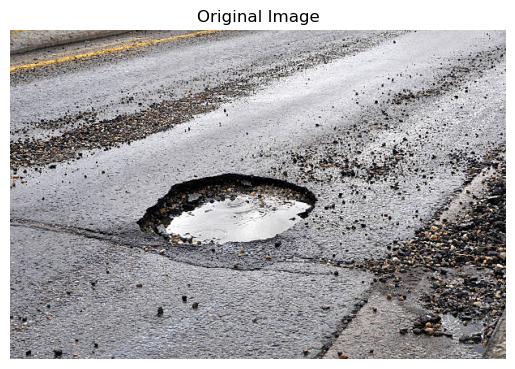

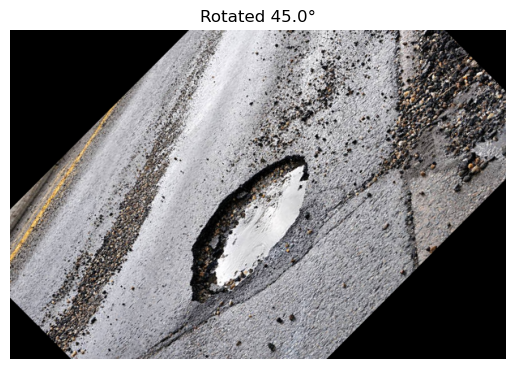


=== Image Processing Menu ===
1. Rotate Image
2. Reflect Image
3. Scale Image
4. Crop Image
5. Affine Transformation
6. Exit
Enter your choice (1-6): 2


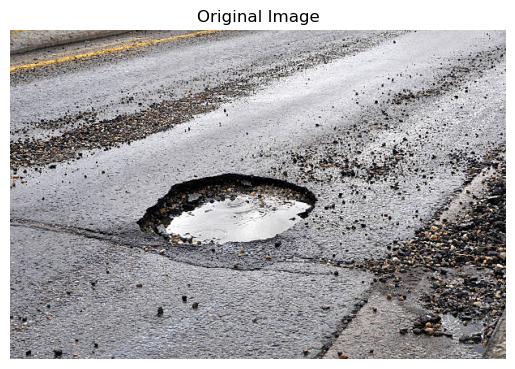

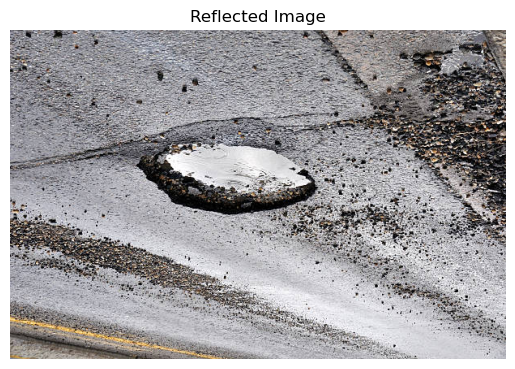


=== Image Processing Menu ===
1. Rotate Image
2. Reflect Image
3. Scale Image
4. Crop Image
5. Affine Transformation
6. Exit
Enter your choice (1-6): 3


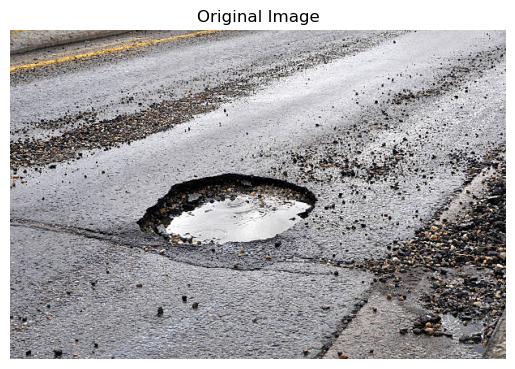

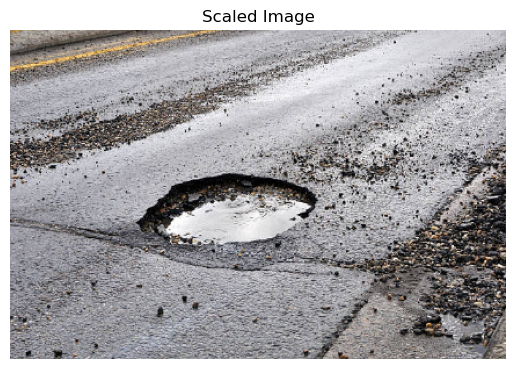


=== Image Processing Menu ===
1. Rotate Image
2. Reflect Image
3. Scale Image
4. Crop Image
5. Affine Transformation
6. Exit
Enter your choice (1-6): 4


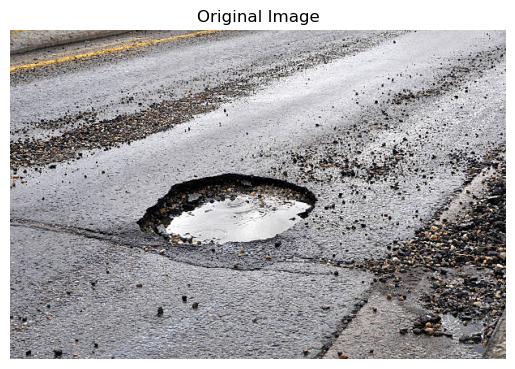

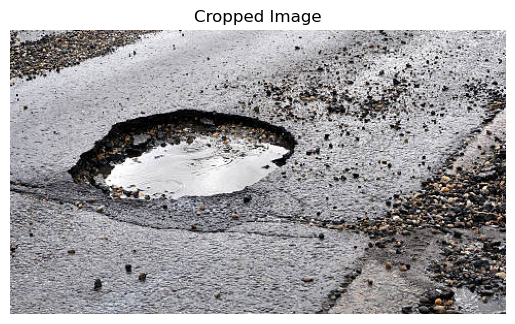


=== Image Processing Menu ===
1. Rotate Image
2. Reflect Image
3. Scale Image
4. Crop Image
5. Affine Transformation
6. Exit
Enter your choice (1-6): 5


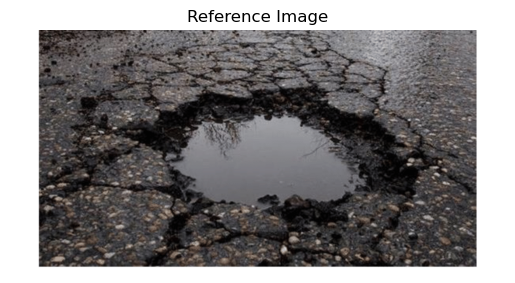

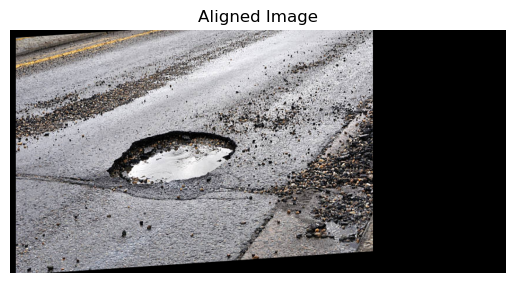


=== Image Processing Menu ===
1. Rotate Image
2. Reflect Image
3. Scale Image
4. Crop Image
5. Affine Transformation
6. Exit
Enter your choice (1-6): 6
Exiting program.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class ImageProcessing:
    def __init__(self, image_path1, image_path2):
        self.image1 = cv2.imread(image_path1)
        self.image2 = cv2.imread(image_path2)
        if self.image1 is None or self.image2 is None:
            print("Error: Unable to load images.")
            exit()

    def display_images(self, images, titles):
        """Display a list of images with corresponding titles."""
        for img, title in zip(images, titles):
            plt.figure()
            plt.imshow(img if len(img.shape) == 2 else cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(title)
            plt.axis('off')
            plt.show()

    def rotate_image(self):
        """Rotate the image by a specified angle."""
        angle = float(input("Enter rotation angle in degrees: "))
        h, w = self.image1.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated = cv2.warpAffine(self.image1, M, (w, h))
        self.display_images([self.image1, rotated], ['Original Image', f'Rotated {angle}°'])

    def reflect_image(self):
        """Reflect the image vertically."""
        reflected = cv2.flip(self.image1, 0)
        self.display_images([self.image1, reflected], ['Original Image', 'Reflected Image'])

    def scale_image(self):
        """Scale the image to 70% of its original size."""
        scaled = cv2.resize(self.image1, None, fx=0.7, fy=0.7, interpolation=cv2.INTER_LINEAR)
        self.display_images([self.image1, scaled], ['Original Image', 'Scaled Image'])

    def crop_image(self):
        """Crop the image to remove a border of 100px from top-left and 30px from bottom-right."""
        x_start, y_start = 100, 100
        x_end, y_end = self.image1.shape[1] - 30, self.image1.shape[0] - 30
        cropped = self.image1[y_start:y_end, x_start:x_end]
        self.display_images([self.image1, cropped], ['Original Image', 'Cropped Image'])

    def affine_transform(self):
        """Apply affine transformation to align two images."""
        pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
        pts2 = np.float32([[60, 60], [210, 50], [60, 210]])
        M = cv2.getAffineTransform(pts1, pts2)
        aligned = cv2.warpAffine(self.image1, M, (self.image2.shape[1], self.image2.shape[0]))
        self.display_images([self.image2, aligned], ['Reference Image', 'Aligned Image'])

def main_menu():
    """Display the main menu options."""
    print("\n=== Image Processing Menu ===")
    print("1. Rotate Image")
    print("2. Reflect Image")
    print("3. Scale Image")
    print("4. Crop Image")
    print("5. Affine Transformation")
    print("6. Exit")

if __name__ == "__main__":
    processor = ImageProcessing('pothole.jpg', 'Pothole2.png')
    while True:
        main_menu()
        choice = input("Enter your choice (1-6): ")
        if choice == '1':
            processor.rotate_image()
        elif choice == '2':
            processor.reflect_image()
        elif choice == '3':
            processor.scale_image()
        elif choice == '4':
            processor.crop_image()
        elif choice == '5':
            processor.affine_transform()
        elif choice == '6':
            print("Exiting program.")
            break
        else:
            print("Invalid choice. Please try again.")
